## PROGRAM TO SOLVE THE 1D CONDUCTION PDE

In [97]:
import numpy
from matplotlib import pyplot
%matplotlib inline


In [98]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16


In [137]:
# Set parameters.
nx = 41  
L = 2.0  
dx = L / (nx - 1)  
nt = 25
dt = 0.0001 
c = 1.0 

x = numpy.linspace(0.0, L, num=nx)
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ])

In [138]:

u0 = numpy.ones(nx)

mask = numpy.where((x >= 0.5) & (x <= 1.0))
print(mask)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),)


In [139]:

u0[mask] = 2.0
for i in range(nx):
    print(x[i], u0[i])


0.0 1.0
0.05 1.0
0.1 1.0
0.15000000000000002 1.0
0.2 1.0
0.25 1.0
0.30000000000000004 1.0
0.35000000000000003 1.0
0.4 1.0
0.45 1.0
0.5 2.0
0.55 2.0
0.6000000000000001 2.0
0.65 2.0
0.7000000000000001 2.0
0.75 2.0
0.8 2.0
0.8500000000000001 2.0
0.9 2.0
0.9500000000000001 2.0
1.0 2.0
1.05 1.0
1.1 1.0
1.1500000000000001 1.0
1.2000000000000002 1.0
1.25 1.0
1.3 1.0
1.35 1.0
1.4000000000000001 1.0
1.4500000000000002 1.0
1.5 1.0
1.55 1.0
1.6 1.0
1.6500000000000001 1.0
1.7000000000000002 1.0
1.75 1.0
1.8 1.0
1.85 1.0
1.9000000000000001 1.0
1.9500000000000002 1.0
2.0 1.0


In [140]:
def plot_figure(x, u0, u):
    pyplot.figure(figsize=(5.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label = 'Initial Conditions', color='C1', linestyle='-', linewidth=2)
    pyplot.plot(x, u, label = 'Current Solution', color='C4', linestyle='-', linewidth=2)
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5);

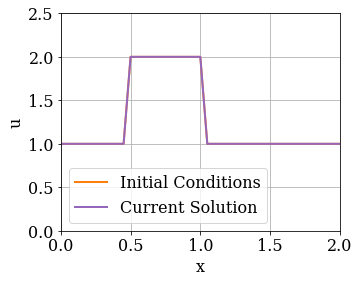

In [141]:
plot_figure(x, u0, u0)

In [142]:
u = u0.copy()
for n in range(1, nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])

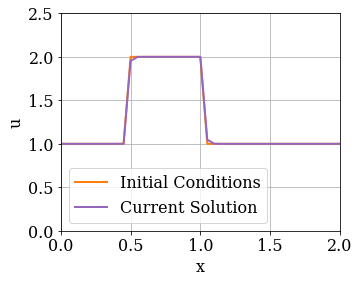

In [143]:

plot_figure(x, u0, u)

## NON LINEAR CONVECTION SECTION

In [195]:
# Set parameters.
nx = 41  
L = 2.0  
dx = L / (nx - 1)  
nt = 25  
dt = 0.02

x = numpy.linspace(0.0, L, num=nx)
u0 = numpy.ones(nx)
mask = numpy.where((x >= 0.5) & (x <= 1.0))
u0[mask] = 2.0

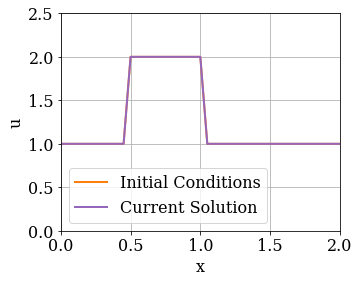

In [199]:
plot_figure(x, u0, u0)

In [203]:
u = u0.copy()
"""
for n in range(1, nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i - 1])
"""

'\nfor n in range(1, nt):\n    un = u.copy()\n    for i in range(1, nx):\n        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i - 1])\n'

In [206]:
# Utilizes array slices (updates everything except the first element) to update the array all at once

for n in range(1, nt):
    u[1:] = un[1:] - dt / dx * un[1:] * (un[1:] - un[:-1])

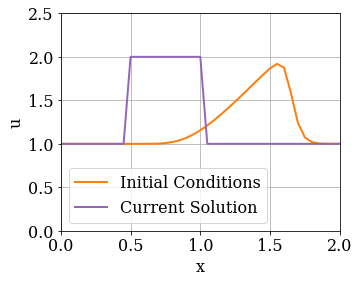

In [207]:
plot_figure(x, u ,u0)